# IM939 - Lab 7 Simpson's Paradox

In the session 6 (week 7) we discussed the Simpson's Paradox. You can explore some case studies in the **applet** by clicking [here](https://math.usu.edu/~schneit/Statlets/Simpson's%20Paradox/)

Here we are going to look at the case study of **"Expenditure data for developmentally-disabled California residents"**. This dataset was adjusted (the original dataset you can find [here](www.StatLit.org/XLS/2014-Taylor-Mickel-Paradox-Data.xlsx)) in order to explain the Simpson's Paradox. You can read the research paper  "Simpson’s Paradox A Data Set and Discrimination Case Study” that uses and explains this dataset [here](http://jse.amstat.org/v22n1/mickel.pdf)
There is also a [documentation of the dataset](http://www.amstat.org/publications/jse/v22n1/mickel/paradox_documentation.docx)

## 1 Data
Here are the key information from the dataset documentation file (every time I use "" below it is a cite from the dataset file).
### Abstract:
"The State of California Department of Developmental Services (DDS) is responsible for allocating funds that support over 250,000 developmentally-disabled residents (e.g., intellectual disability, cerebral palsy, autism, etc.), called here also consumers. The dataset represents a sample of 1,000 of these consumers. Biographical characteristics and expenditure data (i.e., the dollar amount the State spends on each consumer in supporting these individuals and their families) are included in the data set for each consumer.

### Source: 
The data set originates from DDS’s “Client Master File.” In order to remain in compliance with California State Legislation, the data have been altered to protect the rights and privacy of specific individual consumers.
The data set is designed to represent a sample of 1,000 DDS consumers.

### Variable Descriptions:
A header line contains the name of the variables. There are no missing values. 

Id: 5-digit, unique identification code for each consumer (similar to a social security number)

Age Cohort: Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)

Age: Unbinned age variable

Gender: Male or Female

Expenditures: Dollar amount of annual expenditures spent on each consumer

Ethnicity: Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic).

### Research problem
The data set and case study are based on a real-life scenario where there was a claim of discrimination based on ethnicity. The exercise highlights the importance of performing rigorous statistical analysis and how data interpretations can accurately inform or misguide decision makers." (Taylor, Mickel 2014)

## 2 Reading the dataset

You should know the Pandas library already from the lab 1 with James. Here we are going to use it to explore the data and for pivot tables. 
In the folder you downloaded from the Moodle you have a dataset called 'Lab 6 - Paradox Dataset'.

In [75]:
import pandas as pd
df = pd.read_excel('Lab7 - Paradox Dataset.xls')

A reminder: anything with a pd. prefix comes from pandas. This is particulary useful for preventing a module from overwriting inbuilt Python functionality.

Let's have a look at our dataset

In [76]:
df

,Id,AgeCohort,Age,Gender,Expenditures,Ethnicity
0,10486,0-5,3,Male,1454,Hispanic
1,11441,0-5,5,Female,1748,Hispanic
2,11812,0-5,5,Male,1861,Hispanic
3,11842,0-5,5,Male,1598,Hispanic
4,11935,0-5,3,Male,1066,Hispanic
...,...,...,...,...,...,...
995,96426,6-12,9,Male,2544,White not Hispanic
996,96746,6-12,10,Male,3382,Asian
997,97793,6-12,9,Female,1048,Multi Race
998,98683,6-12,8,Male,2441,Hispanic


We have 6 columns (variables) in 1000 rows. Let's see what type of object is our dataset and what types of objects are in the dataset.

In [66]:
type(df)

pandas.core.frame.DataFrame

## 3 Exploring data
### Missing values
Let's check if we have any missing data

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1000 non-null   int64 
 1   AgeCohort     1000 non-null   object
 2   Age           1000 non-null   int64 
 3   Gender        1000 non-null   object
 4   Expenditures  1000 non-null   int64 
 5   Ethnicity     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


The above tables shows that we have 1000 observations for each of 6 columns. 

Let's see if there are any unexpected values.

In [77]:
import numpy as np
np.unique(df.AgeCohort)

array(['0-5', '13-17', '18-21', '22-50', '51 +', '6-12'], dtype=object)

In [28]:
np.unique(df.Age)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 48, 51, 52, 53, 54,
       55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 94,
       95])

In [29]:
np.unique(df.Gender)

array(['Female', 'Male'], dtype=object)

In [30]:
np.unique(df.Ethnicity)

array(['American Indian', 'Asian', 'Black', 'Hispanic', 'Multi Race',
       'Native Hawaiian', 'Other', 'White not Hispanic'], dtype=object)

There aren't any unexpected values in neither of these 4 variables. We didn't run this command for Expenditures on purpose, as this would return us too many values. An easier way to check this variable would be just a boxplot.

<AxesSubplot:>

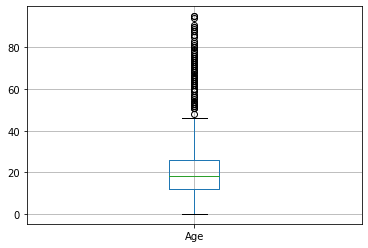

In [31]:
df.boxplot(column=['Age'])

<AxesSubplot:>

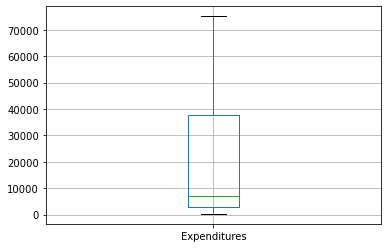

In [32]:
df.boxplot(column=['Expenditures'])

Let's see a summary of data types we have here.

### Data types

In [33]:
df.dtypes

Id               int64
AgeCohort       object
Age              int64
Gender          object
Expenditures     int64
Ethnicity       object
dtype: object

We are creating a new categorical column cat_AgeCohort that would make our work a bit easier later. You can read more [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Categorical.html)

In [78]:
df['cat_AgeCohort'] = pd.Categorical(df['AgeCohort'], 
                                     ordered=True, 
                                     categories=['0-5', '6-12', '13-17', '18-21', '22-50', '51 +'])

Here int64 mean 'a 64-bit integer' and 'object' are strings. This gives you also a hint they are different types of variables. The 'bit' refers to how long and precise the number is. Pandas uses data types from numpy ([pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes), [numpy documentation](https://numpy.org/doc/stable/user/basics.types.html?highlight=array%20interface)). 
In our dataset three variables are numeric: Id, age are ordinal variables, Expenditures is a scale variable. AgeCohort is categorical and Gender and Ethnicity are nominal.  
For that reason 'data.describe' will bring us a summary of numeric variables only.

In [35]:
df.describe()

,Id,Age,Expenditures
count,1000.000000,1000.000000,1000.000000
mean,54662.846000,22.800000,18065.786000
std,25643.673401,18.462038,19542.830884
min,10210.000000,0.000000,222.000000
25%,31808.750000,12.000000,2898.750000
50%,55384.500000,18.000000,7026.000000
75%,76134.750000,26.000000,37712.750000
max,99898.000000,95.000000,75098.000000


It doesn't make sense to plot not numeric variables or ids. That's why we are going to just plot age and expenditures.

<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

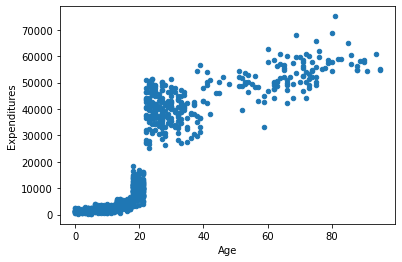

In [79]:
df.plot(x = 'Age', y = 'Expenditures', kind='scatter')

The pattern of data is very interesting, expecially around x-values of ca. 25. The research paper can bring us more clarification.

### Age
The crucial factor in this case study is age: "As consumers get older, their financial needs increase as they move out of their parent’s home, etc. Therefore, it is expected that expenditures for older consumers will be higher than for the younger consumers" 

In the dataset we have two age variables that both refer to the same information - age of consumers. They are saved as two distinct data types: binned 'AgeCohort' and unbinned 'Age'. 

**Age categories** If you look at the binned one you will notice that the categories are somewhat interesting: 

<AxesSubplot:ylabel='Frequency'>

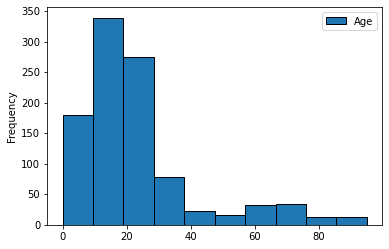

In [71]:
df[['Age']].plot(kind='hist', ec='black')

In [80]:
df["AgeCohort"].describe() #we will receive the output for the categorical variable "AgeCohort"
df['cat_AgeCohort'].describe()

count      1000
unique        6
top       22-50
freq        226
Name: cat_AgeCohort, dtype: object

Here we will run a bar plot of age categories.

<AxesSubplot:>

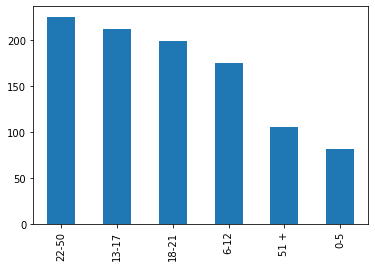

In [81]:
df['cat_AgeCohort'].value_counts().plot(kind="bar")

The default order of plot elements is 'value count'. For the age variable it might be more useful to look at the order chronologically.

<AxesSubplot:xlabel='cat_AgeCohort', ylabel='count'>

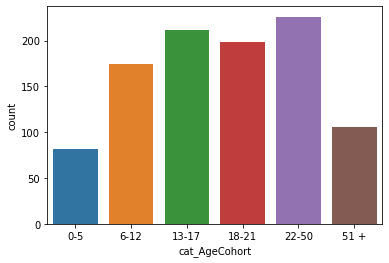

In [82]:
#using sns.countplot from seaborn we will plot AgeCohort
#the order in plotting this variable is really crucial, we want to have sorted by age categories
import seaborn as sns
import matplotlib.pyplot as plt

#here is without sorting / ordering
#sns.countplot(x="AgeCohort", data=df)

#here we plot the variable with sorting
sns.countplot(x="cat_AgeCohort", data=df)



#You can try playing with the commands below too:
#sns.countplot(x="AgeCohort", data=df, order=df['AgeCohort'].value_counts().index)
#sns.countplot(x="AgeCohort", data=df, order=['0-5', '6-12', '13-17', '18-21', '22-50','51+'])

Why would the data be binned in such "uneven" categories like '0-5 years', '6-12' and '22-50'? Instead of even categories e.g. '0-10', '11-20', '21-30' etc. or every 5 years '0-5', '6-10' etc.?

Here the age cohorts **were allocated based on the theory**, rather than based on data (this way we would have even number of people in each category) or based on logical age categories, e.g. every 5 or 10 years.

The authors explain: "The cohorts are established based on the amount of financial support typically required during a particular life phase (...) The 0-5 cohort (preschool age) has the fewest needs and requires the least amount of funding (...) Those in the 51+ cohort have the most needs and require the most amount of funding". You can read in more details in the paper. 

## 4 Exploratory analysis 


The research question is: *are any demographics discriminated in distributions of the funds?*

Following the authors:
"Discrimination exists in this case study if the amount of expenditures for a typical person in a group of consumers that share a common attribute (e.g., gender, ethnicity, etc.) is significantly different when compared to a typical person in another group. For example, discrimination based on gender would occur if the expenditures for a typical female are less than the amount for a typical male."

We are going to examine the data using plots for categorical data and pivot tables (cross-tables) with means.
"Pivot table reports are particularly useful in narrowing down larger data sets or analyzing relationships between data points." Pivot tables will help you understand what is Simpson's Paradox. 

### Age x expenditures
Let's see how expenditures are distributed across age groups.

We are going to use a *swarm plot* which I believe works well here to notice the paradox and "the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution." Read more [here](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)

/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-

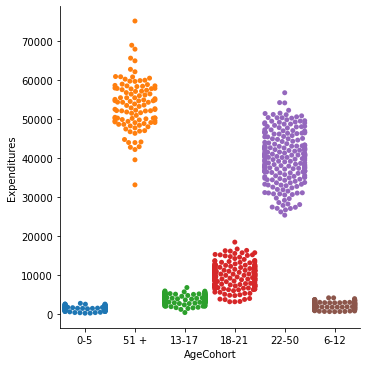

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="AgeCohort", y="Expenditures", kind="swarm", data=df)
#you can also do a boxplot if you change kind="box"

### Ethnicity
Ethnicity could be another discriminating factor. Let's check this here too by plotting expenditures by ethnicity.

These groups reflect the demographic profile of the State of California.

/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-

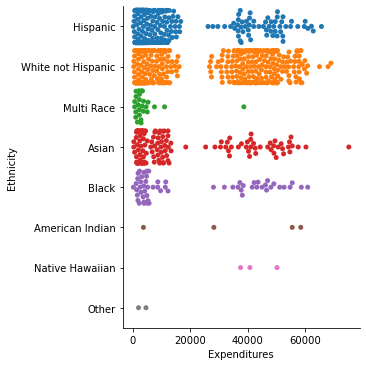

In [42]:
sns.catplot(y="Ethnicity", x="Expenditures", kind="swarm", data=df)

/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-

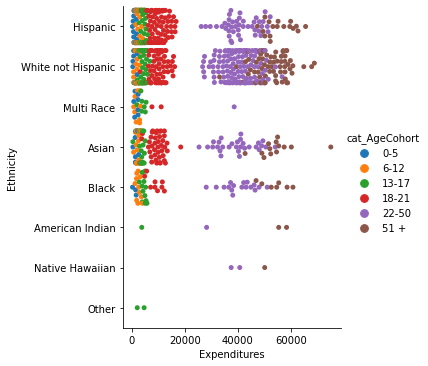

In [84]:
#g=sns.catplot(y="Ethnicity", x="Expenditures", hue='Age', kind="swarm", data=df)
#g._legend.remove()

sns.catplot(y="Ethnicity", x="Expenditures", hue='cat_AgeCohort', kind="swarm", data=df)

### Gender
Gender could have been another discriminating factor (as gender based discrimination is also very common). It is not the case here. See below plots to confirm these. We are plotting expenditures by gender.

/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zofiabm/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='Expenditures'>

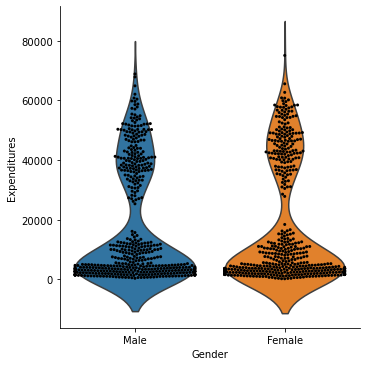

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.catplot(x="Gender", y="Expenditures", kind="swarm", data=df)
#you can create even a nicer plot than for ethnicity, using tips here https://seaborn.pydata.org/tutorial/categorical.html
#It's a combination of swarmplot and violin plot to show each observation along with a summary of the distribution

g = sns.catplot(x="Gender", y="Expenditures", kind="violin", inner=None, data=df)
sns.swarmplot(x="Gender", y="Expenditures", color="k", size=3, data=df, ax=g.ax)

### Mean Expenditures 
This was a quick visual analysis. Let's check means to see how it looks like by age, ethnicity and gender.
Why would it be also good to check medians here?

In [86]:
import pandas as pd
import numpy as np

#By default the aggreggate function is mean

np.round(df.pivot_table(index=['Ethnicity'], values=['Expenditures']), 2)

,Expenditures
Ethnicity,
American Indian,36438.25
Asian,18392.37
Black,20884.59
Hispanic,11065.57
Multi Race,4456.73
Native Hawaiian,42782.33
Other,3316.50
White not Hispanic,24697.55


In [87]:
np.round(df.pivot_table(index=['Gender'], values=['Expenditures']), 2)

,Expenditures
Gender,
Female,18129.61
Male,18001.20


In [88]:
np.round(df.pivot_table(index=['cat_AgeCohort'], values=['Expenditures']), 2)

,Expenditures
cat_AgeCohort,
0-5,1415.28
6-12,2226.86
13-17,3922.61
18-21,9888.54
22-50,40209.28
51 +,53521.90


What do these tables tell us? There is much discrepnacy in average results for ethnicity and age cohort. If we look at gender - there aren't many differences.

Please remember that in this case study "the needs for consumers increase as they become older which results in higher expenditures". This would explain age discrepancies a bit, but what about ethnicity?

# 5 In-depth Analysis - Outliers
Let's try to go a bit more in-depth .
We know that gender doesn't show many differences. In age there are not big differences except for one case. Let's focus on ethnicity then. 

*We are going to use Seaborn's 'catplot'. In the [documentation](https://seaborn.pydata.org/tutorial/categorical.html) we can read what are the error bars here: "In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars."*

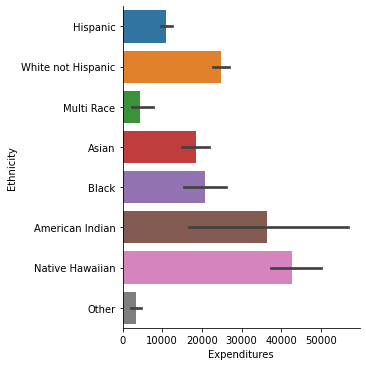

In [89]:
sns.catplot(y="Ethnicity", x='Expenditures', 
            kind="bar", data=df)

#you can also run a nested table, but the chart might be more straightforward in analysis.
#np.round(df.pivot_table(index=['cat_AgeCohort','Ethnicity'], values=['Expenditures']), 2)

In [90]:
np.round(df.pivot_table(index=['Ethnicity'], values=['Expenditures']), 2)

,Expenditures
Ethnicity,
American Indian,36438.25
Asian,18392.37
Black,20884.59
Hispanic,11065.57
Multi Race,4456.73
Native Hawaiian,42782.33
Other,3316.50
White not Hispanic,24697.55


So there are big differences in the averages between ethnicities. Does it mean there is discrimination? 

In [50]:
df.groupby('Ethnicity').count()

,Id,AgeCohort,Age,Gender,Expenditures,cat_AgeCohort
Ethnicity,,,,,,
American Indian,4,4,4,4,4,2
Asian,129,129,129,129,129,116
Black,59,59,59,59,59,52
Hispanic,376,376,376,376,376,359
Multi Race,26,26,26,26,26,26
Native Hawaiian,3,3,3,3,3,2
Other,2,2,2,2,2,2
White not Hispanic,401,401,401,401,401,335


As you can see there are big sample size differences between ethnic groups. 

*What conclusions does it bring?*
There are 3 major ethnicities within the dataset: White non-Hispanic (40%), Hispanic (38%), Asian (13%). The sample sizes of other ethnicites are very small. 

Please also remember that 
1). 
We know it is representative data of the population of residents. So based on this data we can use inferential statistics (look up Week 03 slides if you need a reminder) and estimate results for the whole population of beneficiaries of California DDS. 


2).
Also, if you look into actual demographics of California State [here](https://en.wikipedia.org/wiki/Demographics_of_California#/media/File:Ethic_California_Organized_Pie.png)

You will notce that the proportions of the state are similar to proportions of this case study. Hispanic and White non-Hispanic constitute a majority of California's population.

Let's focus on the top 2 biggest groups. We can see there is a difference in the average expenditures between the White non-Hispanic and Hispanic groups.

In [91]:
##selecting cases that are either 'Hispanic' or 'White non Hispanic' 
Hispanic = df[(df["Ethnicity"] == 'Hispanic') | (df["Ethnicity"] == 'White not Hispanic')]
Hispanic

,Id,AgeCohort,Age,Gender,Expenditures,Ethnicity,cat_AgeCohort
0,10486,0-5,3,Male,1454,Hispanic,0-5
1,11441,0-5,5,Female,1748,Hispanic,0-5
2,11812,0-5,5,Male,1861,Hispanic,0-5
3,11842,0-5,5,Male,1598,Hispanic,0-5
4,11935,0-5,3,Male,1066,Hispanic,0-5
...,...,...,...,...,...,...,...
993,94072,6-12,11,Female,1360,White not Hispanic,6-12
994,94442,6-12,11,Male,2212,Hispanic,6-12
995,96426,6-12,9,Male,2544,White not Hispanic,6-12
998,98683,6-12,8,Male,2441,Hispanic,6-12


In [92]:
np.round(Hispanic.pivot_table(index=['Ethnicity', 'cat_AgeCohort'], values=['Expenditures']), 2)

Expenditures
Ethnicity          cat_AgeCohort              
Hispanic           0-5                 1393.20
                   6-12                2312.19
                   13-17               3955.28
                   18-21               9959.85
                   22-50              40924.12
                   51 +               55585.00
White not Hispanic 0-5                 1366.90
                   6-12                2052.26
                   13-17               3904.36
                   18-21              10133.06
                   22-50              40187.62
                   51 +               52670.42

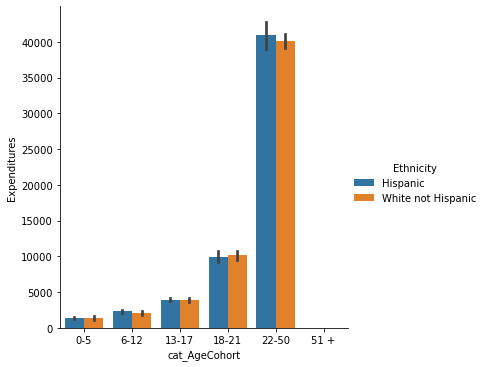

In [53]:
sns.catplot(x="cat_AgeCohort", y='Expenditures', hue="Ethnicity", kind="bar", data=Hispanic)

Let's get back to our original question : does discrimination exist in this case? 

“Is the typical Hispanic consumer receiving fewer funds (i.e., expenditures) than the typical White non-Hispanic consumer? If a Hispanic consumer was to file for discrimination based upon ethnicity, s/he would more than likely be asked his/her age. Since the typical amount of expenditures for Hispanics (in all but one age cohort) is higher than the typical amount of expenditures for White non-Hispanics in the respective age cohort, the discrimination claim would be refuted".

This case study shows **Simpson's Paradox**. 
You may ask: "Why is the overall average for all consumers significantly different indicating ethnic discrimination of Hispanics, yet in all but one age cohort (18-21) the average of expenditures for Hispanic consumers are greater than those of the White non-Hispanic population?" Look at the table below.

In [54]:
pd.crosstab([Hispanic.cat_AgeCohort],Hispanic.Ethnicity)

Ethnicity,Hispanic,White not Hispanic
cat_AgeCohort,,
0-5,44,20
6-12,91,46
13-17,103,67
18-21,78,69
22-50,43,133


**Results**

"There are more Hispanics in the youngest four age cohorts, while the White non-Hispanics have more consumers in the oldest two age cohorts. The two populations are close in overall counts (376 vs. 401).  On top of this, consumers expenditures increase as they age to see the paradox.

Expenditure average for Hispanic consumers are higher in all but one of the age cohorts, but the trend reverses when the groups are combined resulting in a lower expenditure average for all Hispanic consumers when compared to all White non-Hispanics."

"The overall Hispanic consumer population is a relatively younger when compared to the White non-Hispanic consumer population. Since the expenditures for younger consumers is lower, the overall average of expenditures for Hispanics
(vs White non-Hispanics) is less."

In [55]:
pd.crosstab(Hispanic.cat_AgeCohort,Hispanic.Ethnicity, 
            normalize='columns')

# values=Hispanic.Ethnicity,aggfunc=sum,

Ethnicity,Hispanic,White not Hispanic
cat_AgeCohort,,
0-5,0.122563,0.059701
6-12,0.253482,0.137313
13-17,0.286908,0.200000
18-21,0.217270,0.205970
22-50,0.119777,0.397015


# 6 Conclusions
## Explanation

"This exercise is based on a real-life case in California. The situation involved an alleged case of discrimination privileging White non-Hispanics over Hispanics in the allocation of funds to over 250,000 developmentally-disabled California residents. 

A number of years ago, an allegation of discrimination was made and supported by a univariate analysis that examined average annual expenditures on consumers by ethnicity. The analysis revealed that the average annual expenditures on Hispanic consumers was approximately one-third (⅓) of the average expenditures on White non-Hispanic consumers. (...) A bivariate analysis examining ethnicity and age (divided into six age cohorts) revealed that ethnic discrimination did not exist. Moreover, in all but one of the age cohorts, the trend reversed where the average annual expenditures on White non-Hispanic consumers were less than the expenditures on Hispanic consumers."(Taylor, Mickel 2014)

When running the simple table with aggregated data, the discrimination in this case appared evident. After running a few more detailed tables, it appears to be no evidence of discrimination based on this sample and the variables collected.

## Takeaways
The example above concerns a crucial topic of discrimination. 
As you can see, data and statistics alone won't give us the anwser. First results might give us a confusing result. Critical thinking is essential when working with data, in order to account for reasons not evident at the first sight. The authors remind us the following: 1) "outcome of important decisions (such as discrimination claims) are often heavily influenced by statistics and how an incomplete analysis may lead to poor decision making"
2) "importance of identifying and analyzing all sources of specific variation (i.e., potential influential factors) in statistical analyses". This is something we already discussed in previous weeks, but it is never enough to stress it out"

### *Additional Links
Some links regarding categorical data in Python for those interested:


https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#description

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.bar.html

https://seaborn.pydata.org/tutorial/categorical.html

https://seaborn.pydata.org/generated/seaborn.countplot.html